In [ ]:
import sys
import os
import pandas as pd
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '../../')))
from scr.component.data_ingestion import DataIngestion
from scr.component.data_transform import DataTransformation
from scr.component.LGBM_Trainer import LGBM_Trainer
from scr.component.XGB_Trainer import XGB_Trainer
from scr.component.model_evaluation import ModelEvaluation

In [3]:
# if __name__ == "__main__":
#     dotenv.load_dotenv(override=True) 

#     mongo_uri = os.getenv("MONGO_URI")
#     db_name = os.getenv("DB_NAME")
#     collection_name = os.getenv("COLLECTION_NAME")
#     csv_file_path = os.getenv("CSV_FILE")

#     data_ingestion = DataIngestion(mongo_uri, db_name, collection_name)

#     df = data_ingestion.download_data_from_mongodb()

# nếu cell này bị lỗi thì là do mạng kém   

In [4]:
df = pd.read_csv('/home/minhle/mlops/data/web_churn.csv')

In [ ]:
data_transformation = DataTransformation(df)
X_train, X_test, y_train, y_test = data_transformation.train_val_test_splitting()
X_train_transformed, X_test_transformed, y_train, y_test = data_transformation.initiate_data_transformation(X_train, X_test, y_train, y_test)

In [7]:
trainer1 =  LGBM_Trainer()
model1, auc1 = trainer1.fit(X_train_transformed, y_train)

[I 2025-04-17 16:12:57,667] A new study created in memory with name: no-name-9dce22c6-b36a-4bbc-909b-27b80ab60909
[I 2025-04-17 16:12:58,198] Trial 0 finished with value: 0.9320071303822604 and parameters: {'learning_rate': 0.19142214285764694, 'n_estimators': 106, 'min_split_gain': 0.17652357513417083, 'min_child_weight': 0.21294446808595188, 'reg_alpha': 0.5244897161538049, 'reg_lambda': 0.5322913670194007, 'min_child_samples': 94}. Best is trial 0 with value: 0.9320071303822604.
[I 2025-04-17 16:12:58,575] Trial 1 finished with value: 0.9326050691353597 and parameters: {'learning_rate': 0.15998409720103374, 'n_estimators': 71, 'min_split_gain': 0.33211050730080827, 'min_child_weight': 0.9953570226516508, 'reg_alpha': 0.8602917692068739, 'reg_lambda': 0.7166327347780586, 'min_child_samples': 34}. Best is trial 1 with value: 0.9326050691353597.
[I 2025-04-17 16:12:58,884] Trial 2 finished with value: 0.9332803097605785 and parameters: {'learning_rate': 0.1654763393214513, 'n_estimator

In [9]:
trainer2 = XGB_Trainer()
model2, auc2 = trainer2.fit(X_train_transformed, y_train)

[I 2025-04-17 16:13:10,584] A new study created in memory with name: no-name-cb93ae85-7c81-4b29-80d2-deae10228e97
[I 2025-04-17 16:13:12,099] Trial 0 finished with value: 0.9289429868367065 and parameters: {'learning_rate': 0.1780737557337978, 'n_estimators': 225, 'max_depth': 5}. Best is trial 0 with value: 0.9289429868367065.
[I 2025-04-17 16:13:12,446] Trial 1 finished with value: 0.9311401037295454 and parameters: {'learning_rate': 0.17978714898092327, 'n_estimators': 58, 'max_depth': 3}. Best is trial 1 with value: 0.9311401037295454.
[I 2025-04-17 16:13:13,019] Trial 2 finished with value: 0.9281903098782452 and parameters: {'learning_rate': 0.05836536918973792, 'n_estimators': 113, 'max_depth': 4}. Best is trial 1 with value: 0.9311401037295454.
[I 2025-04-17 16:13:14,425] Trial 3 finished with value: 0.9298453105653939 and parameters: {'learning_rate': 0.08564244433502778, 'n_estimators': 166, 'max_depth': 6}. Best is trial 1 with value: 0.9311401037295454.
[I 2025-04-17 16:13:

In [10]:
auc1 > auc2

np.False_

In [ ]:
final_model = model1 if auc1 > auc2 else model2
model = ModelEvaluation(final_model)
y_pred, y_pred_proba = model.predictions(X_test_transformed)
accuracy, precision, recall, f1, roc_auc, pr_auc = model.model_evaluation(y_test, y_pred, y_pred_proba)

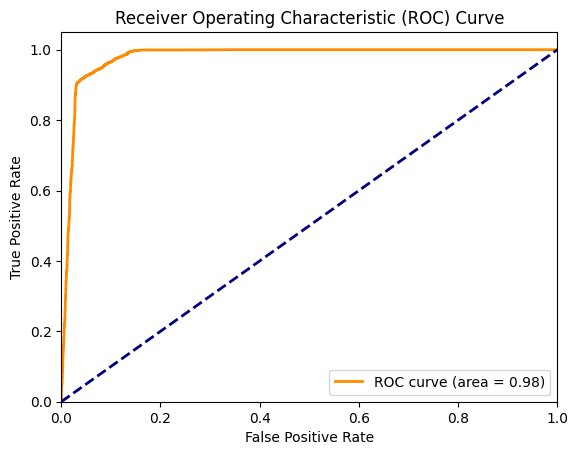

In [16]:
model.plot_roc_curve(y_test, y_pred_proba)

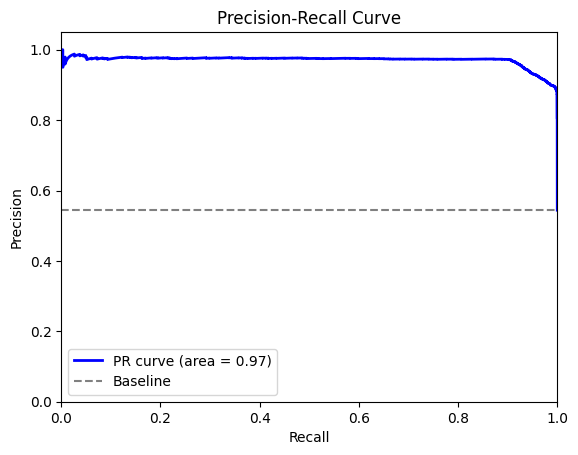

In [18]:
model.plot_pr_curve(y_test, y_pred_proba)